In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import sys

In [2]:
byte_distr_prob = np.load("byte_prob_distr.npy")
print(byte_distr_prob.shape)

new_line = byte_distr_prob[:1000, 10]
comma = byte_distr_prob[:1000, 44]

print(new_line.shape, comma.shape)
input_set = np.vstack((new_line, comma)).T
print(input_set.shape)

(20426, 256)
(1000,) (1000,)
(1000, 2)


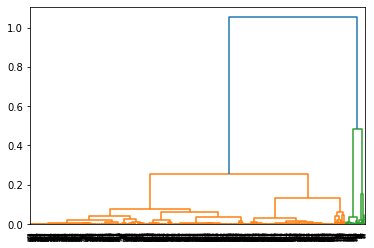

In [3]:
sys.setrecursionlimit(10000)
dendrogram = sch.dendrogram(sch.linkage(input_set, method='ward'))

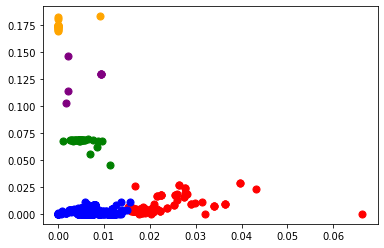

In [4]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(input_set)
labels = model.labels_

X = input_set
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [26]:
print(labels)

[3 2 3 3 4 0 0 1 0 3 3 0 1 3 3 3 3 1 1 1 1 0 0 3 0 3 3 3 1 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
